## ---- Statistical decision making by Mrunal Bokil ----

### Data understanding and goal

#### Data description : Data for 5,891 customers is given and their purchasing history and demographics

#### Goal : 

    1. To predict the sales on black friday
    2. Cluster groups of users on the given information
    

### Steps involved to analyze the data and reach our goal:

    1. Data loading (loading the files)
    2. Data handling (remove missing values, remove the extra words at the end of the numeric words)
    3. Descriptive statistics (target vs )
    4. Data modeling (Apply ML algorithms such as decision tree, random forest, linear regression)
    5. Estimation and performance (r^2, rmse, roc?)

#### Note: Dataset and dataframes used are exemplary meaning that the code in each cell may not run but syntax and flow can be reused in other projects

### Import libraries and load data

In [187]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing

In [217]:
data_file = pd.read_csv("C:/Users/mruna/Desktop/Interview prep/Modeling_exercise_3/BlackFriday.csv")
data_file.head()
#grad_file.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [218]:
data_file.dtypes
#data_file.head()

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Data cleaning


In [219]:
# removing '+' from the age and years fields

#data_file.dtypes 
data_file['Age'] = data_file['Age'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data_file['Stay_In_Current_City_Years'] = data_file['Stay_In_Current_City_Years'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

# removing NaNs in the product category column
data_file['Product_Category_1'].fillna(0, inplace=True)
data_file['Product_Category_2'].fillna(0, inplace=True)
data_file['Product_Category_3'].fillna(0, inplace=True)

# handling the categorical age variable
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data_file['Age'])
data_file['new_age'] = label_encoder.transform(data_file['Age'])

label_encoder.fit(data_file['Gender'])
data_file['new_gender'] = label_encoder.transform(data_file['Gender'])

label_encoder.fit(data_file['City_Category'])
data_file['new_city'] = label_encoder.transform(data_file['City_Category'])


In [220]:
data_file[data_file.columns[11]].head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [221]:
#changing the data type to object to perform get_dummies
data_file['new_age'] = data_file['new_age'].astype('object')
data_file['new_gender'] = data_file['new_gender'].astype('object')
data_file['new_city'] = data_file['new_city'].astype('object')

# using get_dummies to convert categorical to numeric
X = data_file
#X = data_file[['new_age', 'Gender','Occupation', 'City_Category', 'Marital_Status']]
Y = data_file[data_file.columns[11]]
#Y.rename(columns = {'Chance of Admit':'admit_score'}, inplace = True)
Y.columns = ["Purchase"]
drops = ['Purchase', 'Age', 'Gender', 'City_Category']
X.drop(drops, inplace=True, axis=1)

In [222]:
X.head()
#X.columns
#Y.head()
#X.dtypes

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,new_age,new_gender,new_city
0,1000001,P00069042,10,2,0,3,0.0,0.0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,0,0,0
2,1000001,P00087842,10,2,0,12,0.0,0.0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,0.0,0,0,0
4,1000002,P00285442,16,4,0,8,0.0,0.0,6,1,2


In [224]:
data_file.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,new_age,new_gender,new_city
0,1000001,P00069042,10,2,0,3,0.0,0.0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,0,0,0
2,1000001,P00087842,10,2,0,12,0.0,0.0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,0.0,0,0,0
4,1000002,P00285442,16,4,0,8,0.0,0.0,6,1,2


### Descriptive statistics

                            Occupation  Stay_In_Current_City_Years  \
Occupation                    1.000000                    0.031203   
Stay_In_Current_City_Years    0.031203                    1.000000   
Marital_Status                0.024691                   -0.012663   
Product_Category_1           -0.008114                   -0.004182   
Product_Category_2            0.006792                    0.001244   
Product_Category_3            0.011941                    0.001992   
new_age                       0.091898                   -0.004754   
new_gender                    0.117294                    0.015392   
new_city                      0.033781                    0.019948   

                            Marital_Status  Product_Category_1  \
Occupation                        0.024691           -0.008114   
Stay_In_Current_City_Years       -0.012663           -0.004182   
Marital_Status                    1.000000            0.020546   
Product_Category_1                0

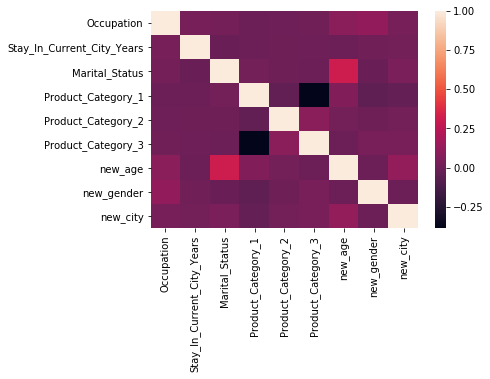

In [225]:
# correlation plot

data_file['new_age'] = data_file['new_age'].astype('int')
data_file['new_gender'] = data_file['new_gender'].astype('int')
data_file['new_city'] = data_file['new_city'].astype('int')
#Stay_In_Current_City_Years
data_file['Stay_In_Current_City_Years'] = data_file['Stay_In_Current_City_Years'].astype('int')

X = X.drop(['User_ID', 'Product_ID'], 1)
df_corr = X.corr()
print(df_corr)
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns)
plt.show()

In [236]:
# describe 

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,new_gender,new_city
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,0.754087,1.040567
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,0.430627,0.759627
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,1.000000,1.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,1.000000,2.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,1.000000,2.000000


### Feature selection

In [226]:
# Variance Inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_score
0,Occupation,2.490962
1,Stay_In_Current_City_Years,2.714610
2,Marital_Status,1.863317
3,Product_Category_1,2.844306
4,Product_Category_2,2.072466
5,Product_Category_3,1.521554
6,new_age,4.451999
7,new_gender,3.401657
8,new_city,2.701233


In [227]:
X.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,new_age,new_gender,new_city
0,10,2,0,3,0.0,0.0,0,0,0
1,10,2,0,1,6.0,14.0,0,0,0
2,10,2,0,12,0.0,0.0,0,0,0
3,10,2,0,12,14.0,0.0,0,0,0
4,16,4,0,8,0.0,0.0,6,1,2


### Data modeling

In [228]:
# split the data to training and testing

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [229]:
# import all ML algorithm libraries

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor

In [230]:
# Linear regression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression R squared: 0.1327
Linear Regression RMSE: 4638.0215


In [231]:
# Randomforest

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 3100.5462


In [ ]:
# Randomforest with Grid Search

#from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

grid_1 = { 'bootstrap': [True],
           'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
   'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
           }
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid = grid_1, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
rfreg1 = RandomForestRegressor(bootstrap= True, max_depth= 100, max_features= 2, min_samples_leaf= 3, min_samples_split= 10,
                               n_estimators= 100)
rfreg1.fit(X_train, y_train)


y_pred = rfreg1.predict(X_test)
print('Linear Regression R squared: %.4f' % rfreg1.score(X_test, y_test))

y_pred = rfreg1.predict(X_test)
rfreg1_mse = mean_squared_error(y_pred, y_test)
rfreg1_rmse = np.sqrt(rfreg1_mse)
print('Random Forest RMSE: %.4f' % rfreg1_rmse)

In [232]:
# GBM

model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared: 0.6430
Gradient Boosting RMSE: 2975.7216


In [233]:
# Decision tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

print('Decision tree R squared: %.4f' % model.score(X_test, y_test))

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Decision Tree RMSE: %.4f' % model_rmse)

Decision tree R squared: 0.5409
Decision Tree RMSE: 3374.4572


## Thank you!